# **Import Library**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, RepeatedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# **Load Data**

In [ ]:
# Assumes your dataset is in a CSV file called 'alzheimers_disease_data.csv'
data = pd.read_csv('alzheimers_disease_data.csv')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

# **Preprocessing Data**

In [ ]:
# Check for missing values
print("Missing values per column:")
print(data.isnull().sum())

Missing values per column:
PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCo

In [ ]:
# Menghilangkan nilai yang hilang
data = data.dropna()

In [ ]:
# Menghilangkan data duplikat
data = data.drop_duplicates()
print(data.describe())

         PatientID          Age       Gender    Ethnicity  EducationLevel  \
count  2149.000000  2149.000000  2149.000000  2149.000000     2149.000000   
mean   5825.000000    74.908795     0.506282     0.697534        1.286645   
std     620.507185     8.990221     0.500077     0.996128        0.904527   
min    4751.000000    60.000000     0.000000     0.000000        0.000000   
25%    5288.000000    67.000000     0.000000     0.000000        1.000000   
50%    5825.000000    75.000000     1.000000     0.000000        1.000000   
75%    6362.000000    83.000000     1.000000     1.000000        2.000000   
max    6899.000000    90.000000     1.000000     3.000000        3.000000   

               BMI      Smoking  AlcoholConsumption  PhysicalActivity  \
count  2149.000000  2149.000000         2149.000000       2149.000000   
mean     27.655697     0.288506           10.039442          4.920202   
std       7.217438     0.453173            5.757910          2.857191   
min      15.00

In [ ]:
# Asumsikan kolom terakhir adalah label
X = data.drop(columns=['PatientID', 'DoctorInCharge', 'Diagnosis'])
y = data['Diagnosis']

# **Train/Test Split**

In [ ]:
# Split the data into training and testing sets with an 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standarisasi fitur agar model bekerja lebih baik
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Random Forest Model and Evaluation**

In [ ]:
# Definisikan model Random Forest
model = RandomForestClassifier(random_state=42)

In [ ]:
# K-Fold Cross Validation
k = 10
kfold = KFold(n_splits=k, shuffle=True, random_state=42)

In [ ]:
# Evaluasi model menggunakan cross_val_score
scores = cross_val_score(model, X, y, cv=kfold)

In [ ]:
# Latih model pada set pelatihan
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Hasil prediksi
y_pred = model.predict(X_test)

In [ ]:
# Tampilkan Classification Report dan Accuracy
print(classification_report(y_test, y_pred))
print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       277
           1       0.96      0.82      0.89       153

    accuracy                           0.93       430
   macro avg       0.94      0.90      0.92       430
weighted avg       0.93      0.93      0.92       430

Model accuracy score: 0.9256


Classification Report Random Forest
[[272   5]
 [ 27 126]]


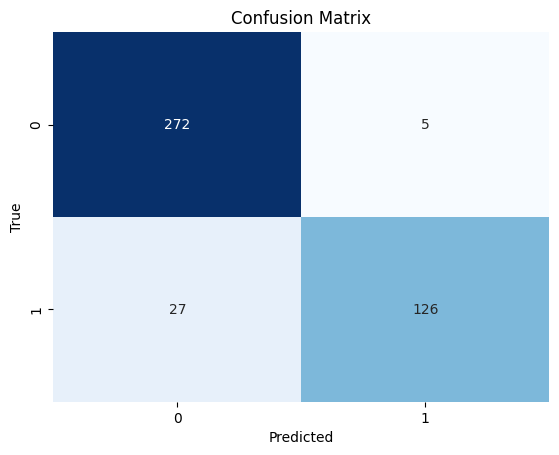

Check for Overfitting and Underfitting
Training set score: 1.0000
Testing set score: 0.9256


In [ ]:
# Tampilkan Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

print("Classification Report Random Forest")
print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred, "Confusion Matrix")

print('Check for Overfitting and Underfitting')
print('Training set score: {:.4f}'.format(model.score(X_train, y_train)))
print('Testing set score: {:.4f}'.format(model.score(X_test, y_test)))

# **Optimasi Model dengan Grid Search**

In [ ]:
# Definisikan parameter grid untuk GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
# Inisialisasi model Random Forest
rf = RandomForestClassifier(random_state=42)

In [ ]:
# Setup validasi silang K-fold dengan n_splits=10
kf = KFold(n_splits=10, shuffle=True, random_state=42)

In [ ]:
# Menjalankan GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=kf, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)


Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=1)

In [ ]:
# Mengambil hasil grid search
cv_results = grid_search.cv_results_

In [ ]:
# Menyusun hasil ke dalam DataFrame
results_df = pd.DataFrame({
    'parameter': cv_results['params'],
    'std_test_score': cv_results['std_test_score'],
    'rank_test_score': cv_results['rank_test_score']
}).sort_values(by='rank_test_score')

In [ ]:
# Menampilkan hasil perbandingan parameter
print("\nHasil Perbandingan Hyperparameter Random Forest:")
print(results_df)


Hasil Perbandingan Hyperparameter Random Forest:
                                             parameter  std_test_score  \
59   {'max_depth': 30, 'min_samples_leaf': 1, 'min_...        0.023693   
86   {'max_depth': None, 'min_samples_leaf': 1, 'mi...        0.023693   
32   {'max_depth': 20, 'min_samples_leaf': 1, 'min_...        0.023426   
78   {'max_depth': 30, 'min_samples_leaf': 4, 'min_...        0.026790   
105  {'max_depth': None, 'min_samples_leaf': 4, 'mi...        0.026790   
..                                                 ...             ...   
100  {'max_depth': None, 'min_samples_leaf': 4, 'mi...        0.032064   
49   {'max_depth': 20, 'min_samples_leaf': 4, 'min_...        0.032064   
103  {'max_depth': None, 'min_samples_leaf': 4, 'mi...        0.032064   
73   {'max_depth': 30, 'min_samples_leaf': 4, 'min_...        0.032064   
76   {'max_depth': 30, 'min_samples_leaf': 4, 'min_...        0.032064   

     rank_test_score  
59                 1  
86             

In [ ]:
# Menguji model terbaik pada data testing
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [ ]:
# Akurasi pada data uji
test_accuracy = best_model.score(X_test, y_test)
print(f"Akurasi pada data uji: {test_accuracy:.4f}")
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)
print("Best estimator: ", grid_search.best_estimator_)

Akurasi pada data uji: 0.9302
Best parameters found:  {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Best cross-validation score:  0.9400822793417651
Best estimator:  RandomForestClassifier(max_depth=30, min_samples_split=5, n_estimators=300,
                       random_state=42)


Classification Report Random Forest setelah Optimasi
[[272   5]
 [ 25 128]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       277
           1       0.96      0.84      0.90       153

    accuracy                           0.93       430
   macro avg       0.94      0.91      0.92       430
weighted avg       0.93      0.93      0.93       430

Model accuracy score setelah optimasi: 0.9302


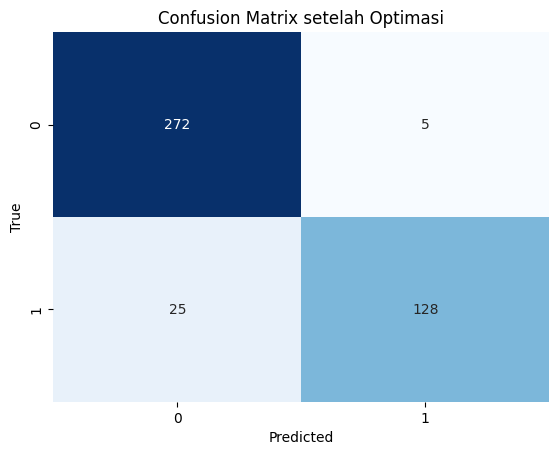

In [ ]:
# Tampilkan Confusion Matrix dan Classification Report
print("Classification Report Random Forest setelah Optimasi")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Model accuracy score setelah optimasi: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))
plot_confusion_matrix(y_test, y_pred, "Confusion Matrix setelah Optimasi")